<a href="https://colab.research.google.com/github/Sowmya-2348562/Reinforcement-Learning/blob/main/2348562_RL_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the ad slots
ad_slots = ["Top Banner", "Sidebar", "Footer", "Pop-up"]

# Initialize the number of times each ad slot has been selected and their respective rewards
n_selected = [0] * len(ad_slots)  # Tracks how many times each ad slot is selected
sum_rewards = [0] * len(ad_slots)  # Tracks total rewards (clicks) for each ad slot
estimated_ctr = [0] * len(ad_slots)  # Estimated CTR (average rewards for each ad slot)

# Parameters for the epsilon-greedy algorithm
epsilon = 0.1  # 10% exploration, 90% exploitation
n_impressions = 1000  # Total number of impressions to simulate

# Simulating actual CTR for each ad slot (this would be unknown in real-world)
true_ctr = [0.05, 0.04, 0.02, 0.01]  # Actual CTR for Top Banner, Sidebar, Footer, and Pop-up

# Function to simulate whether a user clicks on an ad or not (click = 1, no click = 0)
def simulate_click(ad_slot_idx):
    return 1 if random.random() < true_ctr[ad_slot_idx] else 0

# Total clicks for visualization
total_clicks = 0
click_history = []

# Epsilon-Greedy Algorithm Simulation
for i in range(n_impressions):
    # Epsilon-greedy: Explore with probability epsilon, exploit with probability 1 - epsilon
    if random.random() < epsilon:
        # Exploration: randomly select an ad slot
        ad_slot_idx = random.randint(0, len(ad_slots) - 1)
    else:
        # Exploitation: select the ad slot with the highest estimated CTR
        ad_slot_idx = np.argmax(estimated_ctr)

    # Simulate showing an ad and getting feedback (click or no click)
    reward = simulate_click(ad_slot_idx)

    # Update the selected count and reward sum for the chosen ad slot
    n_selected[ad_slot_idx] += 1
    sum_rewards[ad_slot_idx] += reward

    # Update the estimated CTR for the chosen ad slot
    estimated_ctr[ad_slot_idx] = sum_rewards[ad_slot_idx] / n_selected[ad_slot_idx]

    # Update total clicks and click history for visualization
    total_clicks += reward
    click_history.append(total_clicks)

# Output the results after 1000 impressions
print("Final estimated CTR for each ad slot:")
for i, ad_slot in enumerate(ad_slots):
    print(f"{ad_slot}: {estimated_ctr[i]:.4f} (True CTR: {true_ctr[i]:.4f})")

print("\nTotal selections for each ad slot:")
for i, ad_slot in enumerate(ad_slots):
    print(f"{ad_slot}: {n_selected[i]}")

print(f"\nTotal Clicks: {total_clicks}")

Final estimated CTR for each ad slot:
Top Banner: 0.0443 (True CTR: 0.0500)
Sidebar: 0.0317 (True CTR: 0.0400)
Footer: 0.0000 (True CTR: 0.0200)
Pop-up: 0.0435 (True CTR: 0.0100)

Total selections for each ad slot:
Top Banner: 858
Sidebar: 63
Footer: 33
Pop-up: 46

Total Clicks: 42


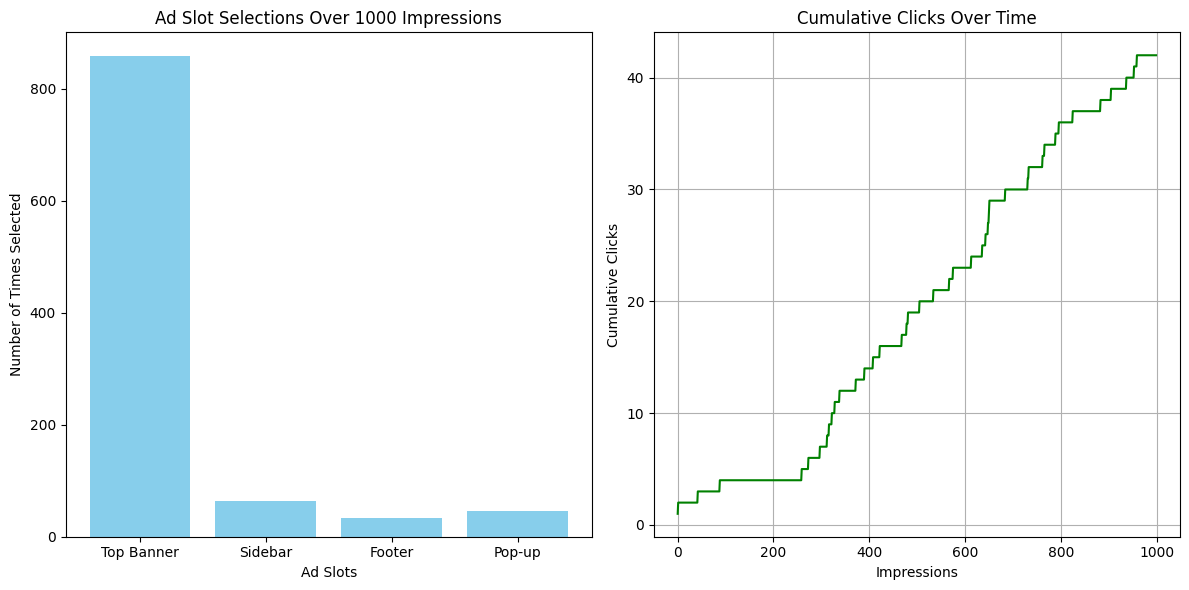

In [ ]:
# Visualizations
plt.figure(figsize=(12, 6))

# Bar plot for selections
plt.subplot(1, 2, 1)
plt.bar(ad_slots, n_selected, color='skyblue')
plt.xlabel('Ad Slots')
plt.ylabel('Number of Times Selected')
plt.title('Ad Slot Selections Over 1000 Impressions')

# Line plot for total clicks
plt.subplot(1, 2, 2)
plt.plot(click_history, color='green')
plt.xlabel('Impressions')
plt.ylabel('Cumulative Clicks')
plt.title('Cumulative Clicks Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()